In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
daily_prices = pd.read_parquet("data+files/sp500_daily_prices.parquet")

In [33]:
daily_prices.head(2)

,date,close,symbol
2544,2010-01-04,31.30,A
2545,2010-01-05,30.96,A


In [34]:
apple = daily_prices.loc[daily_prices.symbol == "AAPL"]

In [35]:
apple.tail(2)

,date,close,symbol
83068,2023-08-04,181.99,AAPL
83069,2023-08-07,179.32,AAPL


In [36]:
stocks = ( daily_prices
          .loc[daily_prices.symbol.isin(["AAPL", "IBM", "BA", "NVDA"])]
          .pivot(index="date", columns="symbol", values="close")
         )

In [37]:
stocks.head()

symbol,AAPL,BA,IBM,NVDA
date,,,,
2010-01-04,7.6432,56.18,132.45,4.6225
2010-01-05,7.6564,58.02,130.85,4.6900
2010-01-06,7.5346,59.78,130.00,4.7200
2010-01-07,7.5207,62.20,129.55,4.6275
2010-01-08,7.5707,61.60,130.85,4.6375


In [38]:
ts = pd.Series(np.random.randn(365), index=pd.date_range("1/1/2023", periods=365, freq="D"))
ts = ts.cumsum()
ts

2023-01-01     2.267883
2023-01-02     2.206198
2023-01-03     2.389426
2023-01-04     2.308422
2023-01-05     2.667875
                ...    
2023-12-27    16.982827
2023-12-28    18.515106
2023-12-29    18.262594
2023-12-30    18.994207
2023-12-31    19.060432
Freq: D, Length: 365, dtype: float64

<Axes: >

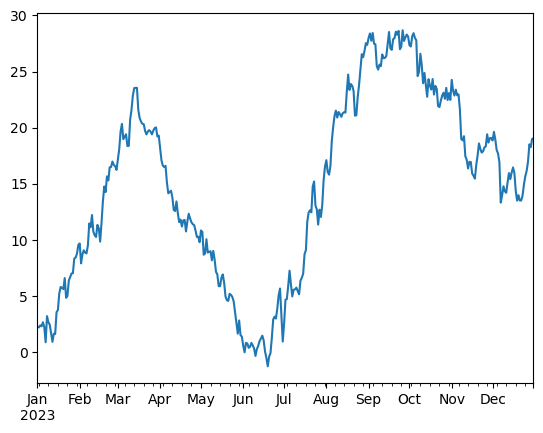

In [39]:
# o index vai ser a linha horizontal
ts.plot()

<Axes: xlabel='date'>

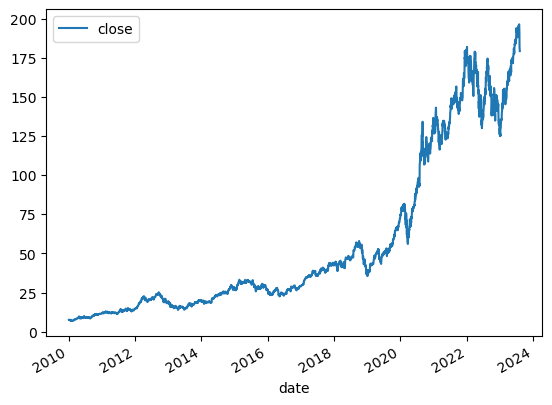

In [40]:
apple.plot(x= "date", y="close")

In [41]:
stocks.head()

symbol,AAPL,BA,IBM,NVDA
date,,,,
2010-01-04,7.6432,56.18,132.45,4.6225
2010-01-05,7.6564,58.02,130.85,4.6900
2010-01-06,7.5346,59.78,130.00,4.7200
2010-01-07,7.5207,62.20,129.55,4.6275
2010-01-08,7.5707,61.60,130.85,4.6375


<Axes: xlabel='date'>

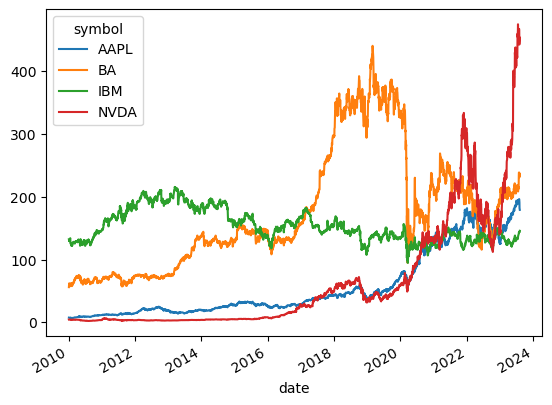

In [42]:
stocks.plot()

<Axes: title={'center': 'Stocks charts'}, xlabel='time periods', ylabel='stock price'>

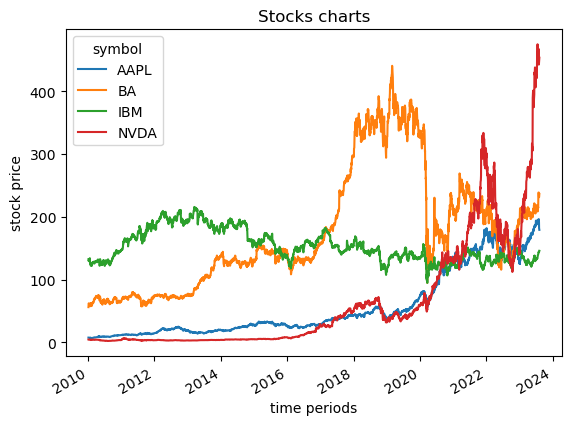

In [43]:
# titulo
stocks.plot(title="Stocks charts", xlabel="time periods", ylabel="stock price")

<Axes: title={'center': 'Stocks charts'}, xlabel='time periods', ylabel='stock price'>

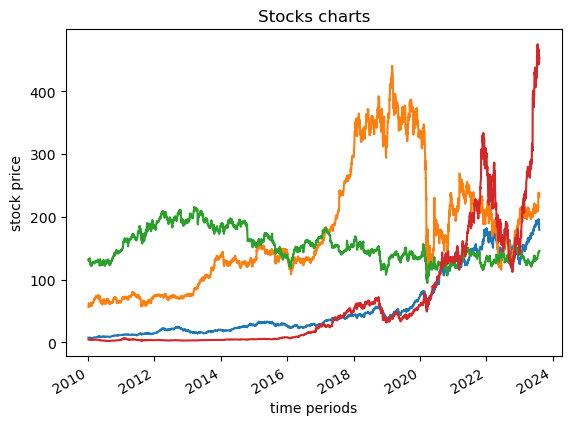

In [44]:
# tirar legenda
stocks.plot(title="Stocks charts", xlabel="time periods", ylabel="stock price", legend=False)

<Axes: title={'center': 'Stocks charts'}, xlabel='date'>

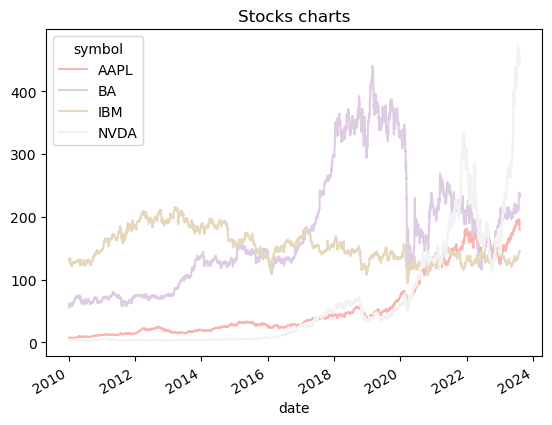

In [45]:
# trocar cor. referencia matplotlib colormap reference
stocks.plot(title="Stocks charts", cmap="Pastel1")

<Axes: xlabel='date'>

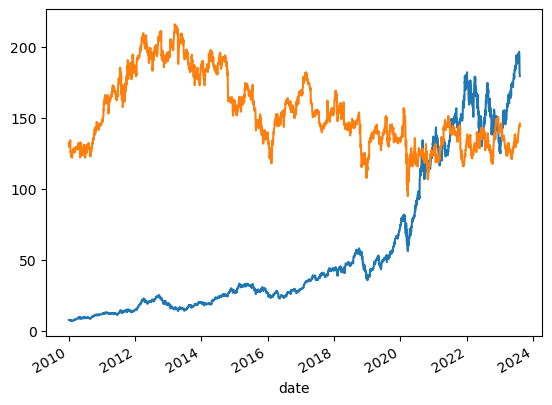

In [46]:
# adicionam no mesmo gráfico
stocks["AAPL"].plot()
stocks["IBM"].plot()

<Axes: >

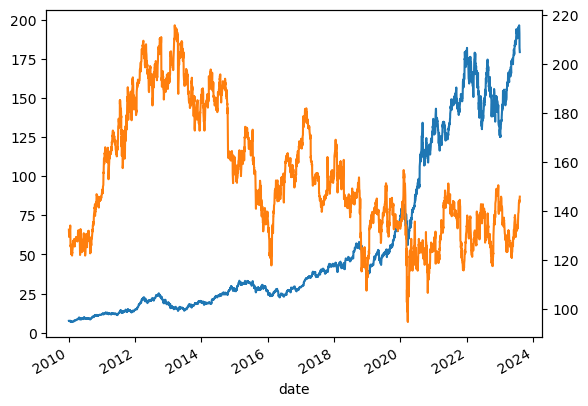

In [47]:
stocks["AAPL"].plot()
stocks["IBM"].plot(secondary_y=True)

<Axes: xlabel='date'>

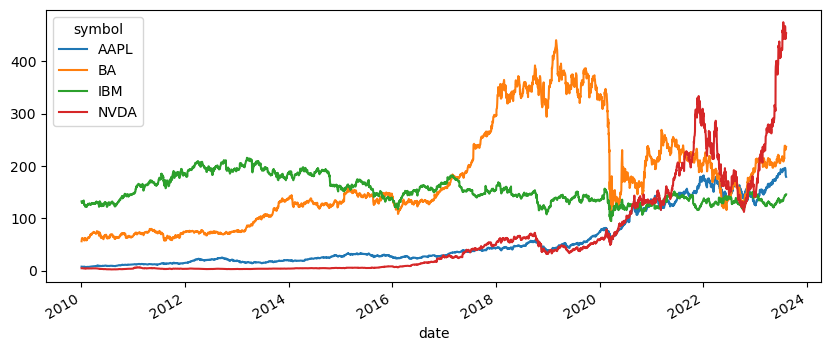

In [48]:
# tamanho
stocks.plot(figsize=(10,4))

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>,
        <Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

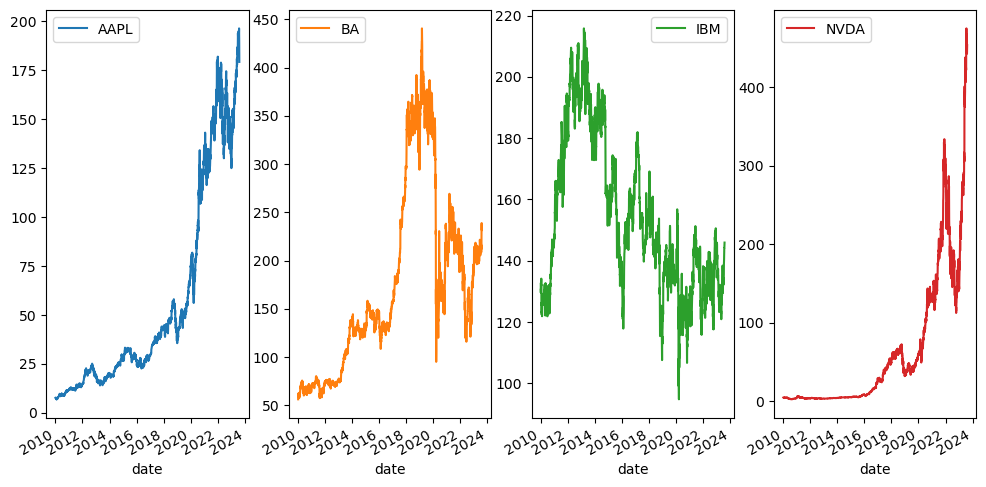

In [49]:
stocks.plot(subplots=True, layout=(1,4),figsize=(12,6))

array([[<Axes: xlabel='date'>],
       [<Axes: xlabel='date'>],
       [<Axes: xlabel='date'>],
       [<Axes: xlabel='date'>]], dtype=object)

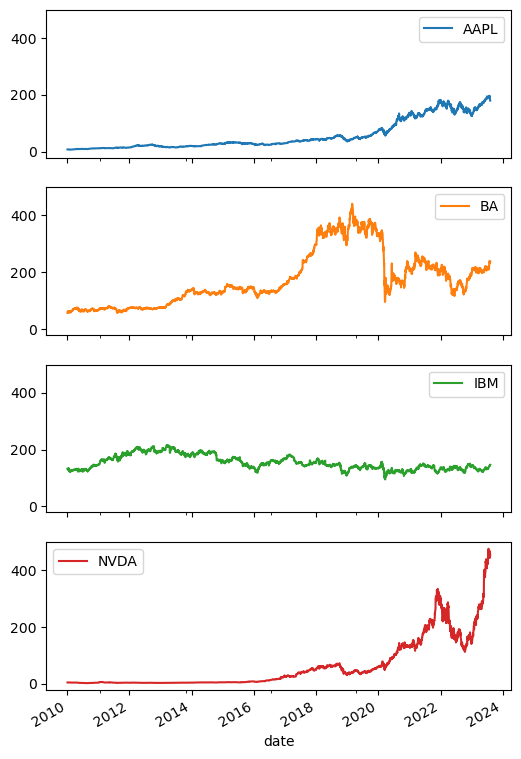

In [50]:
stocks.plot(subplots=True, layout=(4,1),figsize=(6,10),sharex=True,sharey=True)

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

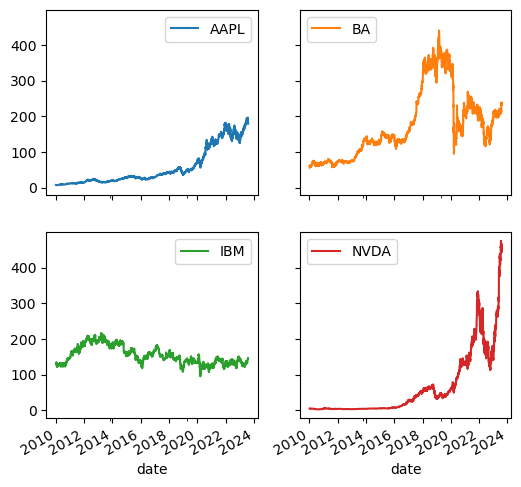

In [51]:
stocks.plot(subplots=True, layout=(2,2),figsize=(6,6),sharex=True,sharey=True)

Bar plots

In [30]:
data1 = pd.DataFrame({
    "Department": ["Dept-A", "Dept-B", "Dept-C", "Dept-D"],
    "TV_Sales": [100, 50, 70, 210],
    "Fridge_Sales": [10, 5, 10, 30]
})
data1

,Department,TV_Sales,Fridge_Sales
0,Dept-A,100,10
1,Dept-B,50,5
2,Dept-C,70,10
3,Dept-D,210,30


<Axes: title={'center': 'Sales'}, xlabel='Department'>

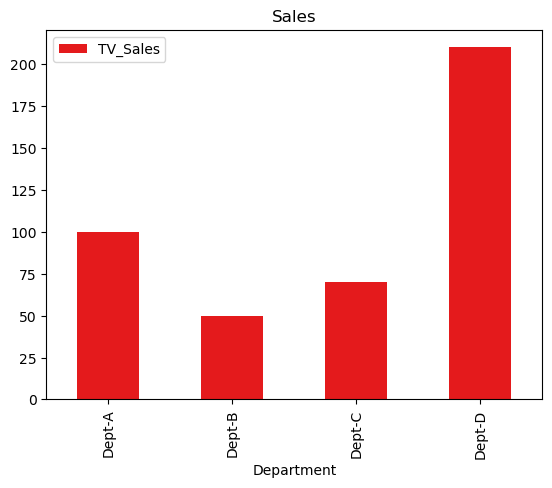

In [55]:
data1.plot.bar(x="Department", y="TV_Sales", title="Sales", cmap="Set1")

<Axes: title={'center': 'Sales'}, xlabel='Department'>

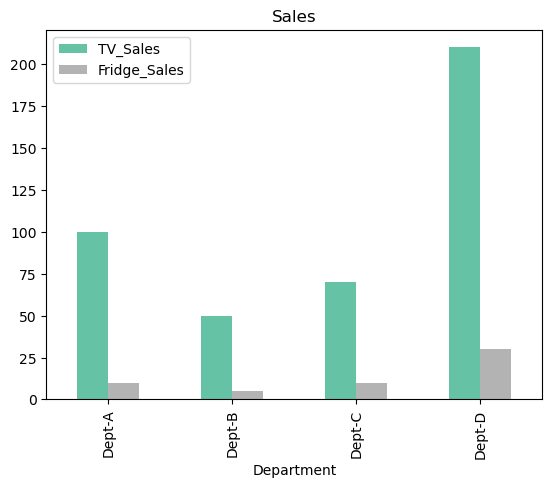

In [56]:
data1.plot.bar(x="Department", title="Sales", cmap="Set2")

<Axes: title={'center': 'Sales'}, xlabel='Department'>

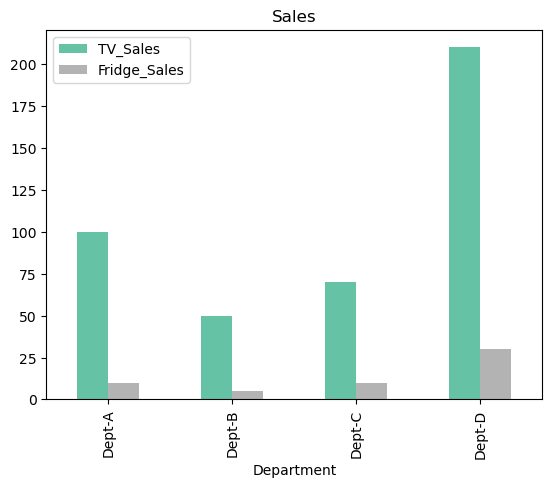

In [57]:
data1.plot.bar(x="Department",y=["TV_Sales","Fridge_Sales"], title="Sales", cmap="Set2")

<Axes: title={'center': 'Sales'}, xlabel='units', ylabel='Department'>

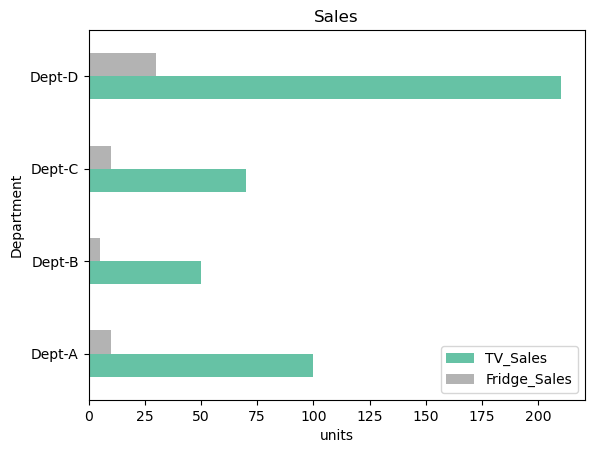

In [59]:
data1.plot.barh(x="Department",y=["TV_Sales","Fridge_Sales"], title="Sales", cmap="Set2", xlabel= "units")

<Axes: title={'center': 'Sales'}, xlabel='Department'>

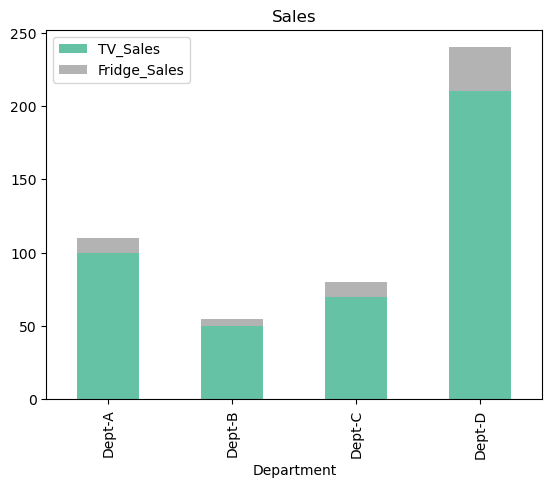

In [62]:
data1.plot.bar(x="Department", title="Sales", cmap="Set2",stacked=True)